## Multiple Logistic Regression

* It is simple to illustrate examples in logistic regression when there is just one predictors variable.
* But the approach ‘easily’ generalizes to the situation where there are multiple predictors.
* However, there are also a number of issues raised which will apply to both logistic and linear regression with multiple predictors.  

### Two predictors and Two Classes

<p align="center">
  <img src="TwoPredictorsTwoClasses.png" alt="alt text" width="33%">
</p>



* Earlier we saw the general form of simple logistic regression, meaning when there
is just one predictor used in the model. 
* The model statement:
$$  \ln\left( \frac{P(Y = 1 \mid x)}{1 - P(Y = 1 \mid x)} \right) = \beta_0 + \beta_1 x $$
* Multiple logistic regression is a generalization to multiple predictors. 
More
* We can define a multiple logistic regression model to predict 𝑃(𝑌 = 1)
as such:

$$ \ln \left( \frac{P(Y = 1 \mid X)}{1 - P(Y = 1 \mid X)} \right)
= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_kx_k$$

where $X = \{x_1,x_2,x_3,x_4,...x_k \}$

* Its useful for us to begin getting used matrix-vector forms of writing this model down 

$$ \ln\left(\frac{P(Y = 1 \mid \boldsymbol(X))}{1 - P(Y = 1 \mid \boldsymbol(X))}\right) = \boldsymbol{\beta}^\top \mathbf{x}
$$

* I used a $\mathbf{x}$ to indicate a vector and $\boldsymbol{X}$ to indicate a matrix. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:

#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("../data/diabetes_nan.csv")

Exploratory Data Analysis

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Handling missing data.  

In this particular data set, we can see that two variables, Insuin and SkinThickness are missing a lot of data.  

We could choose to keep these data, and reduce the number of participants.  Or we could choose to remove these data, and keep all the variables. 

Neither choice is correct.  Both sacrifice something.  For the purposes of this demonstration, I am going to just remove Insulin, but we will keep Skinthickness.  

* To remove a variable from the data frame


In [5]:

pima_new = pima.drop('Insulin', axis=1)


In [6]:
#I grabbed a list of all the columns 
cols = pima_new.columns
print(cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


* To detect and remove rows (patients with missing data)

In [7]:
pima_new.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* To remove the subjects that have missing data, 

In [8]:
pima_clean = pima_new.dropna()

In [9]:
pima_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               532 non-null    int64  
 1   Glucose                   532 non-null    float64
 2   BloodPressure             532 non-null    float64
 3   SkinThickness             532 non-null    float64
 4   BMI                       532 non-null    float64
 5   DiabetesPedigreeFunction  532 non-null    float64
 6   Age                       532 non-null    int64  
 7   Outcome                   532 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 37.4 KB


In [10]:
pima_clean['Outcome'].value_counts()

Outcome
0    355
1    177
Name: count, dtype: int64

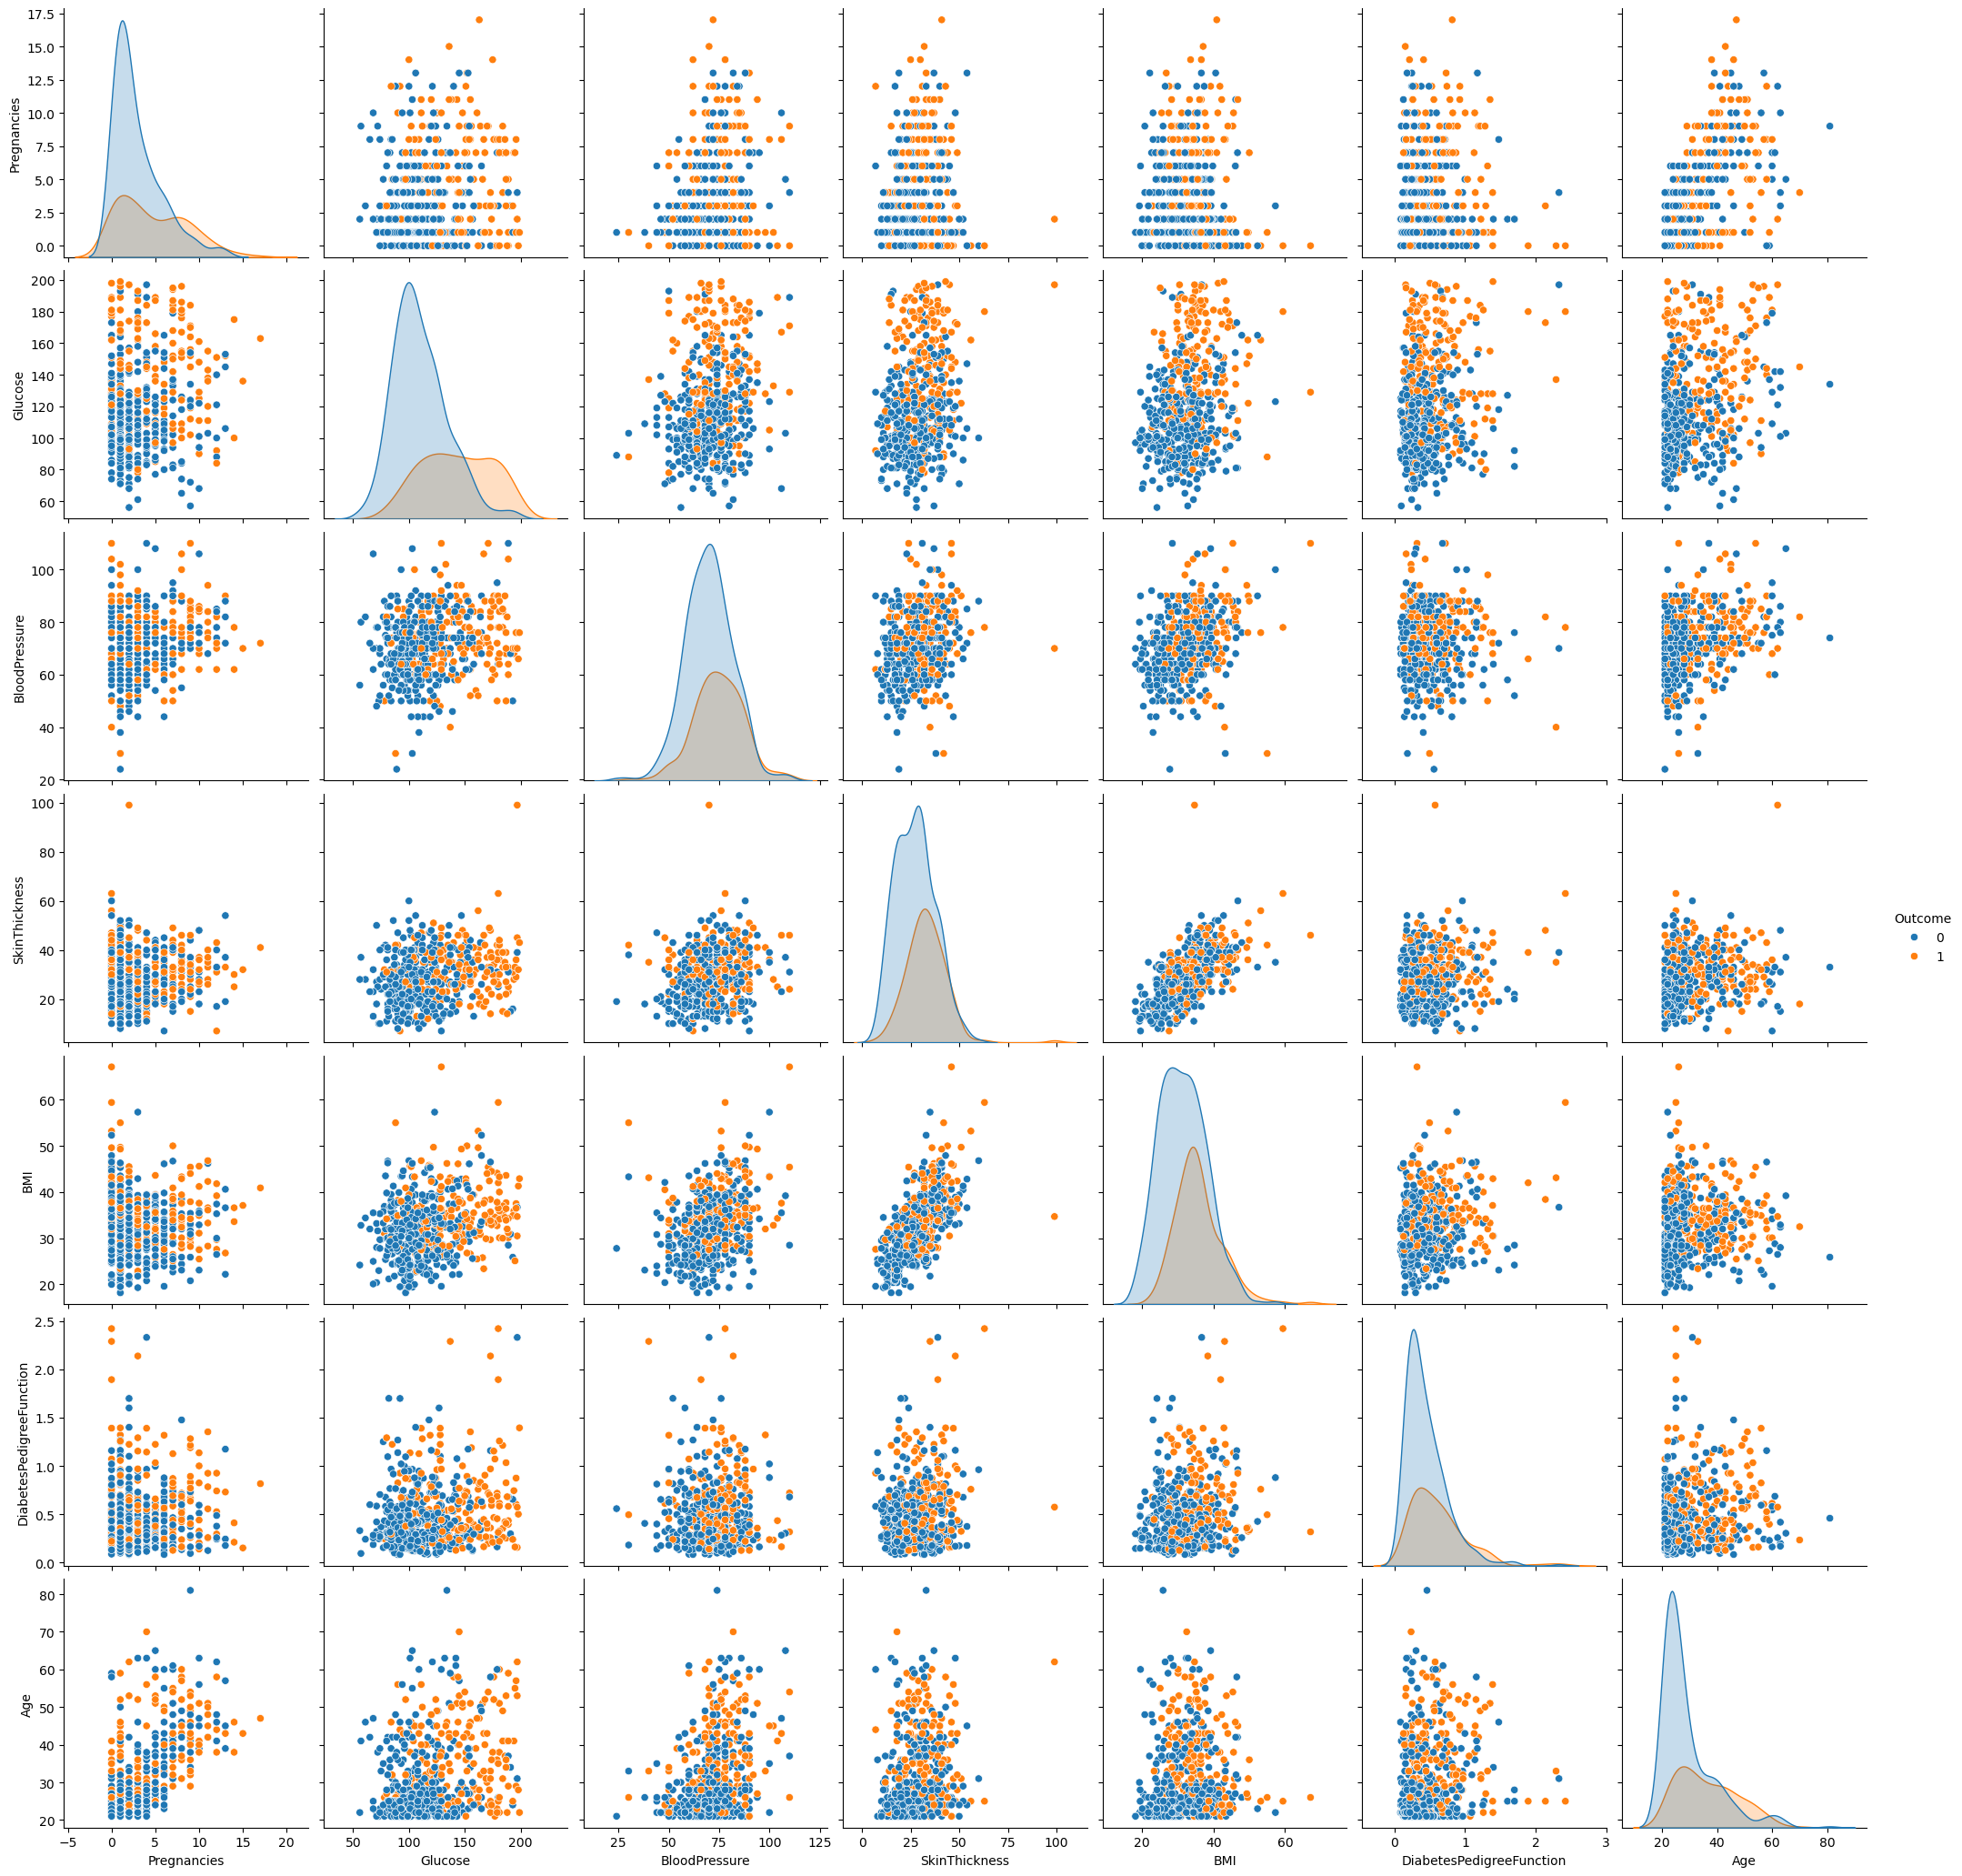

In [11]:
sns.pairplot(pima_clean,hue ="Outcome", height=3);
plt.show()

<Axes: xlabel='SkinThickness', ylabel='Count'>

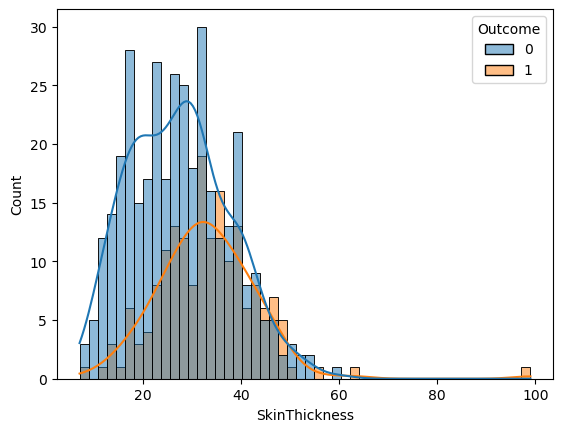

In [12]:
sns.histplot(pima_clean,x='SkinThickness',kde=True, bins = 50,hue='Outcome')

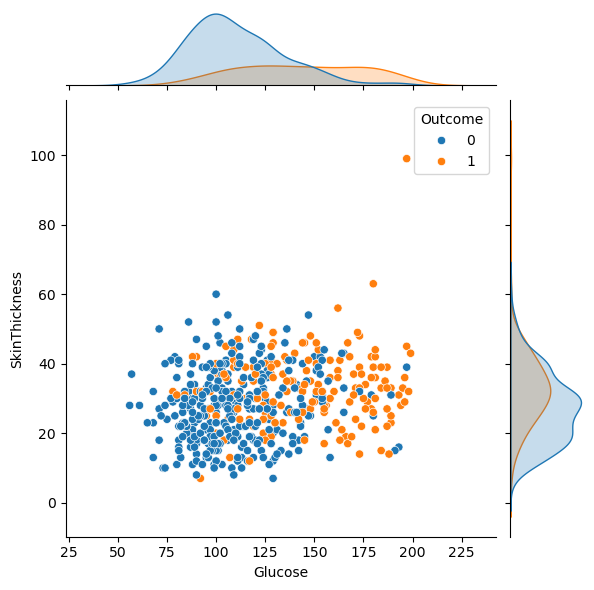

In [13]:
sns.jointplot(pima_clean,x='Glucose',y = "SkinThickness", hue='Outcome')
plt.show()

Split the data frames into test and training dataframes

In [14]:
train_df,test_df = train_test_split(pima_clean, test_size=0.25, random_state=16)


In [15]:
# instantiate the model (using the default parameters, except random_state and max_iter)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

# fit the model with data
logreg.fit(train_df[['Glucose']], train_df['Outcome'])

LogisticRegression(max_iter=5000, random_state=16)

In [16]:
logreg.score(test_df[['Glucose']],test_df['Outcome'])

0.7518796992481203

In [17]:
b0 = logreg.intercept_
b1 = logreg.coef_[0]
threshhold = -b0/b1

In [18]:
# instantiate the model (using the default parameters, except random_state and max_iter)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

# fit the model with data
logreg.fit(train_df[cols[0:7]], train_df['Outcome'])

LogisticRegression(max_iter=5000, random_state=16)

In [19]:

logreg.score(test_df[cols[0:7]],test_df['Outcome'])


0.7669172932330827

Lets get the predictions and a confusion matrix

In [20]:
diabetes_pred = logreg.predict(test_df[cols[0:7]])

In [21]:
cnf_matrix = confusion_matrix(test_df['Outcome'], diabetes_pred)

([<matplotlib.axis.YTick at 0x7f1528565810>,
 [Text(0, 0.5, 'Undiagnosed'), Text(0, 1.5, 'Diabetes')])

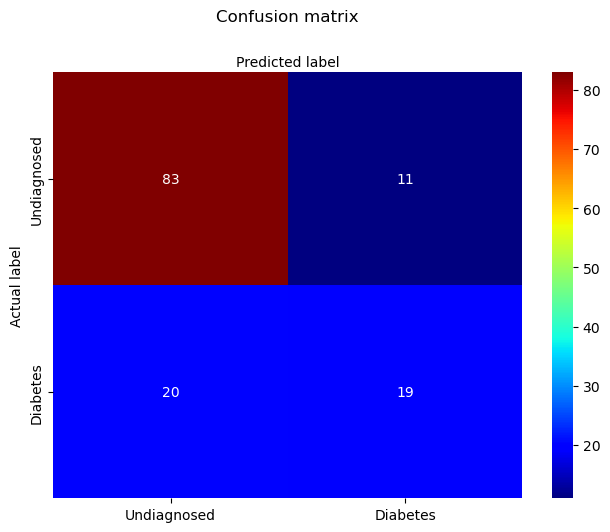

In [22]:
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)

Get Precision Recall and F-1 score

In [23]:
print(classification_report(test_df['Outcome'],diabetes_pred,target_names=class_names))


              precision    recall  f1-score   support

 Undiagnosed       0.81      0.88      0.84        94
    Diabetes       0.63      0.49      0.55        39

    accuracy                           0.77       133
   macro avg       0.72      0.69      0.70       133
weighted avg       0.76      0.77      0.76       133



ROC curve

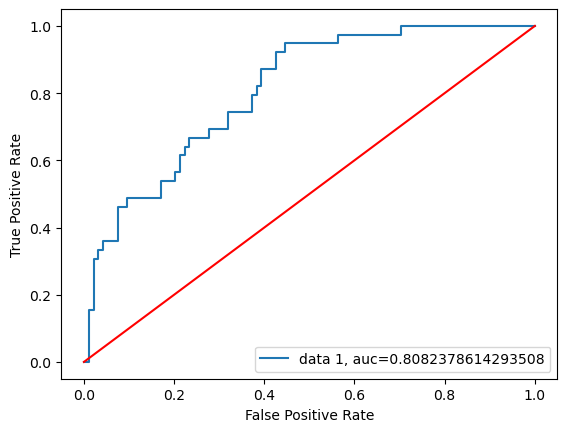

In [24]:
diabetes_pprob = logreg.predict_proba(test_df[cols[0:7]])
fpr, tpr, _ = roc_curve(test_df['Outcome'],  diabetes_pprob[:,1])
auc = roc_auc_score(test_df['Outcome'], diabetes_pprob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()